In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("layoffs.csv")
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Amazon,Seattle,16000.0,1/28/2026,NaN,Retail,https://www.aboutamazon.com/news/company-news/...,Post-IPO,8100.0,United States,1/28/2026
1,Pinterest,SF Bay Area,700.0,1/27/2026,0.15,Consumer,https://www.theverge.com/news/868531/pinterest...,Post-IPO,1500.0,United States,1/27/2026
2,Expedia,Seattle,NaN,1/27/2026,NaN,Travel,https://www.businessinsider.com/expedia-cuts-r...,Post-IPO,3300.0,United States,1/28/2026
3,Entropy,New York City,NaN,1/25/2026,1.00,Crypto,https://www.theblock.co/post/386942/entropy-a1...,Seed,27.0,United States,1/26/2026
4,Autodesk,SF Bay Area,1000.0,1/22/2026,0.07,Other,https://www.reuters.com/business/world-at-work...,Post-IPO,NaN,United States,1/23/2026


In [3]:
df.columns

Index(['company', 'location', 'total_laid_off', 'date', 'percentage_laid_off',
       'industry', 'source', 'stage', 'funds_raised', 'country', 'date_added'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              4277 non-null   object 
 1   location             4276 non-null   object 
 2   total_laid_off       2801 non-null   float64
 3   date                 4277 non-null   object 
 4   percentage_laid_off  2700 non-null   float64
 5   industry             4275 non-null   object 
 6   source               4274 non-null   object 
 7   stage                4272 non-null   object 
 8   funds_raised         3792 non-null   float64
 9   country              4275 non-null   object 
 10  date_added           4277 non-null   object 
dtypes: float64(3), object(8)
memory usage: 367.7+ KB


In [5]:
# Conver date column to date-time dtype

df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              4277 non-null   object        
 1   location             4276 non-null   object        
 2   total_laid_off       2801 non-null   float64       
 3   date                 4277 non-null   datetime64[ns]
 4   percentage_laid_off  2700 non-null   float64       
 5   industry             4275 non-null   object        
 6   source               4274 non-null   object        
 7   stage                4272 non-null   object        
 8   funds_raised         3792 non-null   float64       
 9   country              4275 non-null   object        
 10  date_added           4277 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 367.7+ KB


In [7]:
# funds_raised and date_added are not useful for analysis:

df.drop(columns=["date_added","funds_raised"], inplace = True)
df.columns

Index(['company', 'location', 'total_laid_off', 'date', 'percentage_laid_off',
       'industry', 'source', 'stage', 'country'],
      dtype='object')

In [9]:
# We remove source from features:

df.drop(columns=["source"], inplace= True, errors='ignore')
df.columns

Index(['company', 'location', 'total_laid_off', 'date', 'percentage_laid_off',
       'industry', 'stage', 'country'],
      dtype='object')

In [10]:
# We check the statistical distribution of numeric columns:

df.describe()

,total_laid_off,date,percentage_laid_off
count,2801.000000,4277,2700.000000
mean,294.873617,2023-01-09 00:56:33.780687616,0.294173
min,3.000000,2020-03-11 00:00:00,0.000000
25%,40.000000,2022-07-12 00:00:00,0.100000
50%,88.000000,2023-01-26 00:00:00,0.170000
75%,200.000000,2023-11-16 00:00:00,0.330000
max,22000.000000,2026-01-28 00:00:00,1.000000
std,1042.931039,NaN,0.303985


Insights:
1. Max number of employees laid off was 22000 while minimum was 3.

2. Highest percentage of employees laid off was 100% i.e. the entire workforce was removed.

In [12]:
# Check for null values:

df.isna().sum()

,0
company,0
location,1
total_laid_off,1476
date,0
percentage_laid_off,1577
industry,2
stage,5
country,2


Observations: Many companies do not disclose their layoff data, so we preserve the NaN for numeic column and Unknown for categorical columns.

In [13]:
cat_cols = ["location", "industry", "stage", "country"]

df[cat_cols] = df[cat_cols].fillna("Unknown")

In [14]:
df["total_laid_off_clean"] = df["total_laid_off"].fillna(0)

In [17]:
#check for duplicates:

df.duplicated().sum()

np.int64(3)

In [18]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [24]:
# Creating Year and Month column from date

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head(3)

/tmp/ipython-input-2192890219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
/tmp/ipython-input-2192890219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month


,company,location,total_laid_off,date,percentage_laid_off,industry,stage,country,total_laid_off_clean,year,month
0,Amazon,Seattle,16000.0,2026-01-28,NaN,Retail,Post-IPO,United States,16000.0,2026,1
1,Pinterest,SF Bay Area,700.0,2026-01-27,0.15,Consumer,Post-IPO,United States,700.0,2026,1
2,Expedia,Seattle,NaN,2026-01-27,NaN,Travel,Post-IPO,United States,0.0,2026,1


In [26]:
# Top companies by total layoffs
df.groupby("company")["total_laid_off_clean"].sum().sort_values(ascending=False).head(10)


,total_laid_off_clean
company,
Amazon,58024.0
Intel,43115.0
Microsoft,30055.0
Meta,26800.0
Salesforce,16525.0
Cisco,14521.0
Tesla,14500.0
Google,13697.0
Dell,12650.0


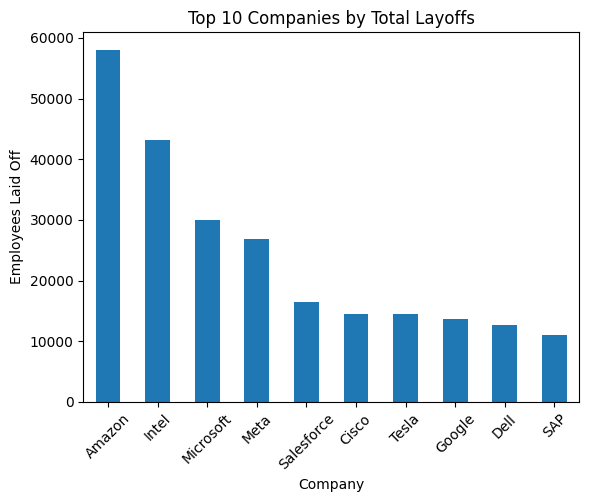

In [31]:
top_companies = (
    df.groupby("company")["total_laid_off_clean"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_companies.plot(kind="bar")
plt.title("Top 10 Companies by Total Layoffs")
plt.xlabel("Company")
plt.ylabel("Employees Laid Off")
plt.xticks(rotation=45)
plt.show()

In [27]:
# Layoffs per year
df.groupby("year")["total_laid_off_clean"].sum()


,total_laid_off_clean
year,
2020,80998.0
2021,15823.0
2022,164319.0
2023,264320.0
2024,152922.0
2025,123741.0
2026,22668.0


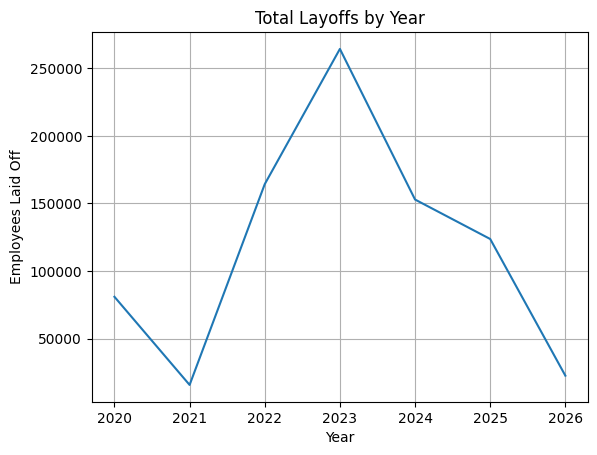

In [30]:
layoffs_by_year = (
    df.groupby("year")["total_laid_off_clean"]
    .sum()
    .reset_index()
)

plt.plot(layoffs_by_year["year"], layoffs_by_year["total_laid_off_clean"])
plt.title("Total Layoffs by Year")
plt.xlabel("Year")
plt.ylabel("Employees Laid Off")
plt.grid(True)
plt.show()

In [28]:
# Industries most affected
df.groupby("industry")["total_laid_off_clean"].sum().sort_values(ascending=False)


,total_laid_off_clean
industry,
Retail,104411.0
Hardware,93207.0
Other,87635.0
Consumer,83860.0
Transportation,64530.0
Finance,53924.0
Food,50611.0
Healthcare,38904.0
Travel,23370.0


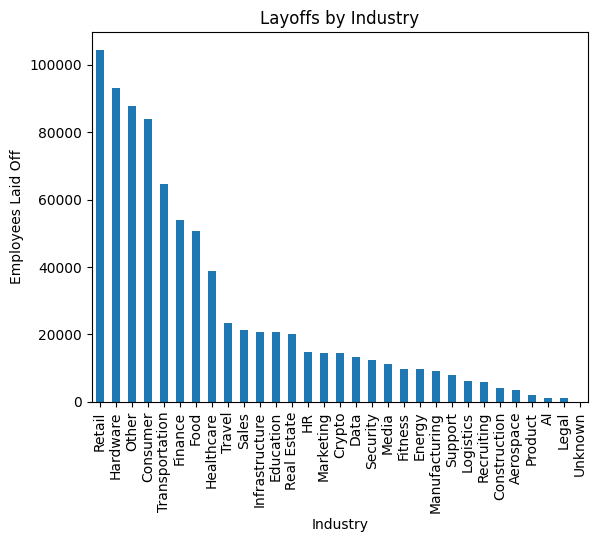

In [33]:
industry_layoffs = (
    df.groupby("industry")["total_laid_off_clean"]
    .sum()
    .sort_values(ascending=False)
)

industry_layoffs.plot(kind="bar")
plt.title("Layoffs by Industry")
plt.xlabel("Industry")
plt.ylabel("Employees Laid Off")
plt.xticks(rotation=90)
plt.show()

Insights:

1. Over the five years, the least layoffs were observed in AI and Legal industries with highest in Retail and Hardware.

2. 2023 was the year on the peak of layoffs, with a downward slope on both side of the timeline.

3. Amazon laid off the maximum employess followed by Intel, Microsoft and Meta.

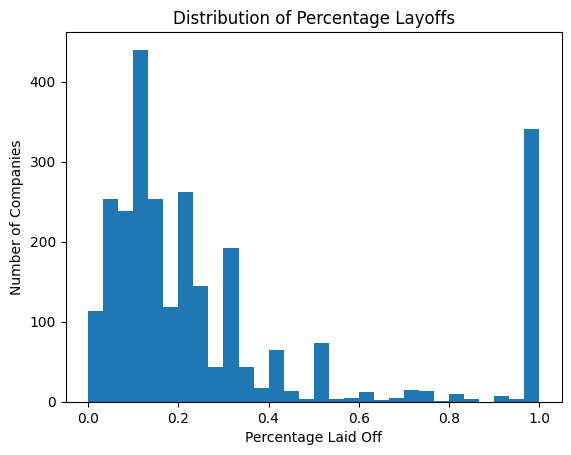

In [34]:
#Severity analysis using percentage layoffs

high_severity = df[df["percentage_laid_off"].notna()]

plt.hist(high_severity["percentage_laid_off"], bins=30)
plt.title("Distribution of Percentage Layoffs")
plt.xlabel("Percentage Laid Off")
plt.ylabel("Number of Companies")
plt.show()

Insighst: Most companies hit 10-20% layoffs but some show 100% layoffs which points to a complete shutdown.

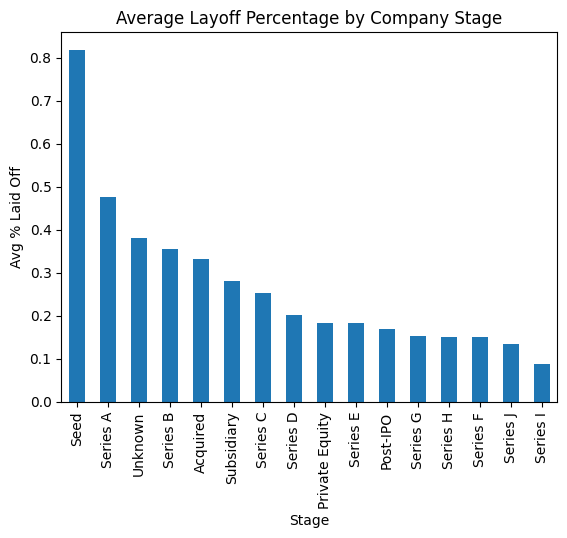

In [36]:
#Stage analysis : Startups Vs MNCs

stage_severity = (
    df.groupby("stage")["percentage_laid_off"]
    .mean()
    .sort_values(ascending=False)
)

stage_severity.plot(kind="bar")
plt.title("Average Layoff Percentage by Company Stage")
plt.xlabel("Stage")
plt.ylabel("Avg % Laid Off")
plt.xticks(rotation=90)
plt.show()

In [37]:
summary = df.groupby("stage")["percentage_laid_off"].agg(
    mean_pct="mean",
    median_pct="median",
    count="count"
).sort_values("mean_pct", ascending=False)

summary


,mean_pct,median_pct,count
stage,,,
Seed,0.818559,1.000,111
Series A,0.476136,0.330,176
Unknown,0.379813,0.200,427
Series B,0.354673,0.250,321
Acquired,0.332238,0.180,185
Subsidiary,0.280625,0.175,16
Series C,0.253273,0.170,278
Series D,0.201291,0.150,244
Private Equity,0.182826,0.100,46


Insights: Early stage startups tend to layoff more workforce by percentage then big techs even though the numbers projected by big techs are absolutely high.

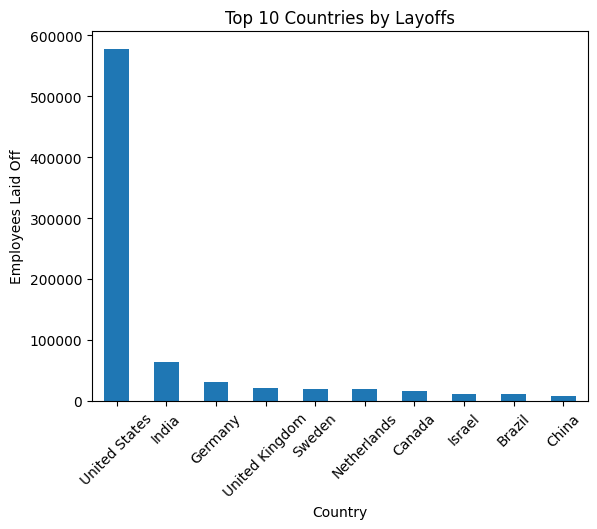

In [38]:
# Country wise analysis:
country_layoffs = (
    df.groupby("country")["total_laid_off_clean"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_layoffs.plot(kind="bar")
plt.title("Top 10 Countries by Layoffs")
plt.xlabel("Country")
plt.ylabel("Employees Laid Off")
plt.xticks(rotation=45)
plt.show()


Insights: USA had the maximum number of layoffs followed by India.

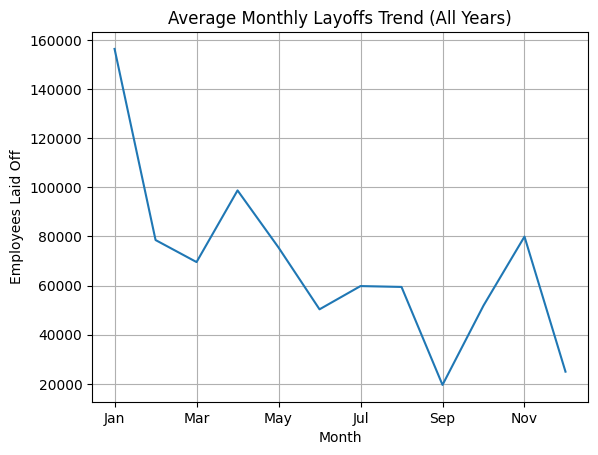

In [42]:
# Month wise analysis:

monthly = (
    df.groupby(df["date"].dt.month)["total_laid_off_clean"]
    .sum()
)

monthly.index = [
    "Jan","Feb","Mar","Apr","May","Jun",
    "Jul","Aug","Sep","Oct","Nov","Dec"
]

monthly.plot()
plt.title("Average Monthly Layoffs Trend (All Years)")
plt.xlabel("Month")
plt.ylabel("Employees Laid Off")
plt.grid(True)
plt.show()



Insights:

This shows that the peaks were observed around Jan followed by April and Nov.


# **CONCLUSION:**

This analysis shows that tech layoffs vary widely in both scale and severity. Large, post-IPO companies account for most job losses in absolute numbers, while early-stage startups experience more severe layoffs, often cutting a large share of their workforce. Layoffs display clear seasonality, peaking in January and late Q4, and are concentrated in Consumer, Retail, and Tech-related industries. Overall, the results highlight how economic downturns impact companies differently based on size and maturity.